# TODO: rst -> tree -> dis -> tree == rst -> tree

## TODO: normalize whitespace during conversion: '  ' -> ' '

### TODO: create minimal example with whitespace

In [1]:
import codecs
import os
import re

import discoursegraphs as dg
from discoursegraphs.readwrite.tree import t
from discoursegraphs.readwrite.rst.dis.common import DisFile

In [2]:
maz_14399_rs3 = '/home/arne/.virtualenvs/discoursegraphs/local/lib/python2.7/site-packages/discoursegraphs-0.3.2-py2.7.egg/discoursegraphs/data/potsdam-commentary-corpus-2.0.0/rst/maz-14399.rs3'
minimal_rs3 = '/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/foo-bar-circ-bar-to-foo.rs3'
min2_rs3 = '/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3'

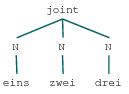

In [3]:
dg.read_rs3tree(min2_rs3)

In [4]:
MIN_RS3_STR = """
<rst>
  <header>
    <relations>
      <rel name="elaboration" type="rst" />
      <rel name="joint" type="multinuc" />
    </relations>
  </header>
  <body>
    <segment id="1" parent="4" relname="joint">eins zwei  drei</segment>
    <segment id="2" parent="4" relname="joint">vier   fünf  sechs   .</segment>
    <segment id="3" parent="4" relname="joint">I  bims .  Wüss'   iss  ? I  woaß es  a net!</segment>
    <group id="4" type="multinuc" />
  </body>
</rst>
"""

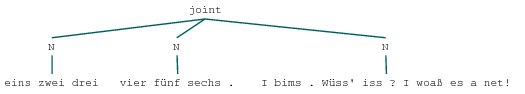

In [5]:
min_rs3_tree = dg.read_rs3tree.fromstring(MIN_RS3_STR)
min_rs3_tree # OKAY

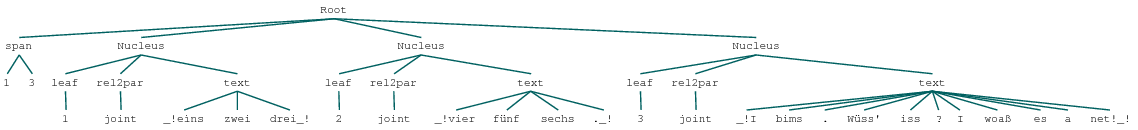

In [6]:
dg.write_dis(min_rs3_tree, '/tmp/min_rs3_tree.dis')

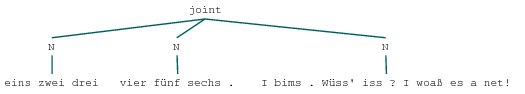

In [7]:
dg.read_distree('/tmp/min_rs3_tree.dis')

In [23]:
min_rs3_tree.tree.pformat() == dg.read_distree('/tmp/min_rs3_tree.dis').tree.pformat()

True

In [8]:
okay = 0
fail = 0

for rs3_file in dg.corpora.pcc.get_files_by_layer('rst'):
    rs3_fname = os.path.basename(rs3_file)
    rst_tree = dg.read_rs3tree(rs3_file)
    
    tree_fname = rs3_fname + '.tree'
    with codecs.open(tree_fname, 'w', 'utf-8') as outfile:
        outfile.write(rst_tree.tree.pformat())
    
    dis_fname = rs3_fname + '.dis'
    dis_tree = dg.write_dis(rst_tree, dis_fname)
    
    reconverted_rst_tree = dg.read_distree(dis_fname)
    reconverted_tree_fname = rs3_fname + '.tree-reconverted'
    with codecs.open(reconverted_tree_fname, 'w', 'utf-8') as outfile:
        outfile.write(reconverted_rst_tree.tree.pformat())
    
    if rst_tree.tree.pformat() != reconverted_rst_tree.tree.pformat():
        fail += 1
        print "FAIL: ", rs3_fname, os.path.getsize(reconverted_tree_fname)
    else:
        okay += 1
#         print "OKAY: ", rs3_fname

print "OKAY counts: ", okay
print "FAIL counts: ", fail

OKAY counts:  176
FAIL counts:  0


In [9]:
import re

DIS_TEST_STR = """( Root (span 1 2)
  ( Satellite (leaf 1) (rel2par Contrast) (text _!Sie hatte vor ( ! ) der langen Nacht die Zahlen gedruckt ._!) )
  ( Nucleus (leaf 2) (rel2par span) (text _!an den Initiator , den Internationalen Bund ( IB ) , übergeben ._!) )
)"""

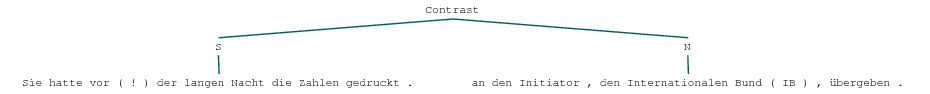

In [10]:
dis_test_tree = dg.read_distree.fromstring(DIS_TEST_STR)
dis_test_tree # OKAY, correctly converted to RST tree

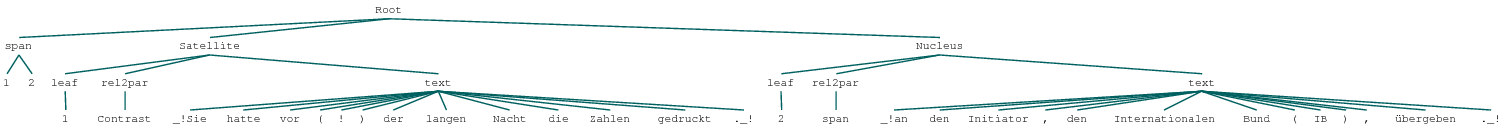

In [11]:
dis_test_tree.disfile_tree  # OKAY, correctly parsed

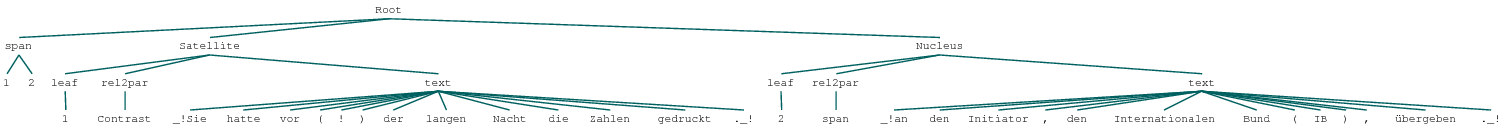

In [12]:
dg.write_dis(dis_test_tree) # OKAY, corectly converted back

In [13]:
dis_test_tree.disfile_tree.pformat() == dg.write_dis(dis_test_tree).disfiletree.pformat()

True

In [14]:
print dg.write_dis(dis_test_tree).disfiletree.pformat()

(Root
  (span 1 2)
  (Satellite
    (leaf 1)
    (rel2par Contrast)
    (text
      _!Sie
      hatte
      vor
      (
      !
      )
      der
      langen
      Nacht
      die
      Zahlen
      gedruckt
      ._!))
  (Nucleus
    (leaf 2)
    (rel2par span)
    (text
      _!an
      den
      Initiator
      ,
      den
      Internationalen
      Bund
      (
      IB
      )
      ,
      übergeben
      ._!)))


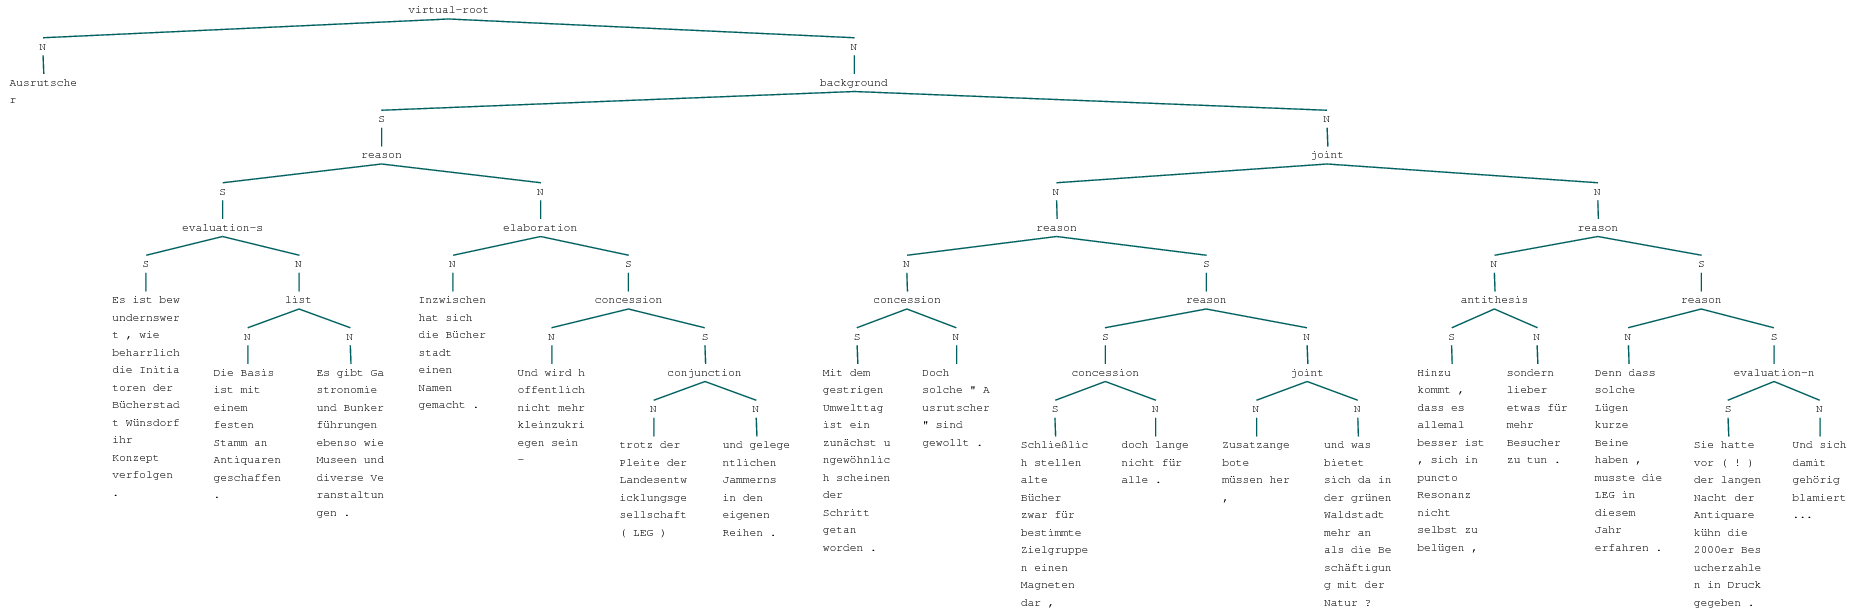

In [15]:
maz_8727_tree = dg.read_distree('maz-8727.rs3.dis', word_wrap=10)
maz_8727_tree # FAIL: '( ! )' is missing

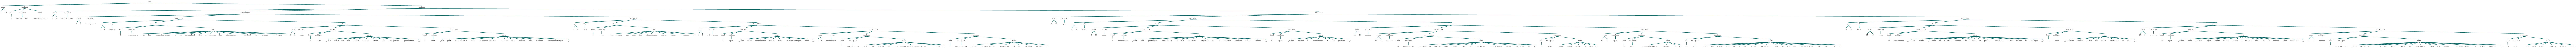

In [16]:
maz_8727_tree.disfile_tree # FAIL, contains '!' instead of '( ! )'

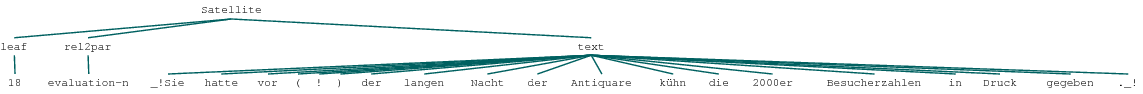

In [17]:
maz_8727_tree.disfile_tree[2][3][3][3][3][2]

In [18]:
dis_subtree = maz_8727_tree.disfile_tree[2][3][3][3][3][2]
dis_subtree_str = dis_subtree.pformat()
print dis_subtree_str

(Satellite
  (leaf 18)
  (rel2par evaluation-n)
  (text
    _!Sie
    hatte
    vor
    (
    !
    )
    der
    langen
    Nacht
    der
    Antiquare
    kühn
    die
    2000er
    Besucherzahlen
    in
    Druck
    gegeben
    ._!))


In [19]:
u' '.join(line.strip() for line in dis_subtree_str.splitlines())

u'(Satellite (leaf 18) (rel2par evaluation-n) (text _!Sie hatte vor ( ! ) der langen Nacht der Antiquare k\xfchn die 2000er Besucherzahlen in Druck gegeben ._!))'

In [20]:
def join_lines(matchobj):
    edu_multiline_str = matchobj.group(0)
    ed_oneline_str = u' '.join(line.strip()
                               for line in edu_multiline_str.splitlines())
    return re.sub('\n', '', ed_oneline_str)

print re.sub('_!(.*?)_!', join_lines, dis_subtree_str, flags=re.DOTALL)

(Satellite
  (leaf 18)
  (rel2par evaluation-n)
  (text
    _!Sie hatte vor ( ! ) der langen Nacht der Antiquare kühn die 2000er Besucherzahlen in Druck gegeben ._!))
